Сгенерируйте данные с помощью кода:

In [207]:
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.linear_model import  Lasso # линейная модель с L1-регуляризацией
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier

import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [141]:
X, y = make_classification(scale=1)

In [142]:
labels = []
for i in range(20):
    labels.append('X' + str(i))
    
df = pd.DataFrame(X, columns=labels)
df ['y'] = y
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 21 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X0      100 non-null    float64
 1   X1      100 non-null    float64
 2   X2      100 non-null    float64
 3   X3      100 non-null    float64
 4   X4      100 non-null    float64
 5   X5      100 non-null    float64
 6   X6      100 non-null    float64
 7   X7      100 non-null    float64
 8   X8      100 non-null    float64
 9   X9      100 non-null    float64
 10  X10     100 non-null    float64
 11  X11     100 non-null    float64
 12  X12     100 non-null    float64
 13  X13     100 non-null    float64
 14  X14     100 non-null    float64
 15  X15     100 non-null    float64
 16  X16     100 non-null    float64
 17  X17     100 non-null    float64
 18  X18     100 non-null    float64
 19  X19     100 non-null    float64
 20  y       100 non-null    int32  
dtypes: float64(20), int32(1)
memory usage: 1

Постройте модель логистической регрессии и оцените среднюю точность. Для этого используйте следующий код:

In [143]:
cross_val_score(LogisticRegression(), X, y, scoring='accuracy').mean()

0.9399999999999998

Используйте статистические методы для отбора признаков:
a) Выберите признаки на основе матрицы корреляции.
b) Отсеките низковариативные признаки (VarianceThreshold).
c) Повторите п. 2 на отобранных признаках в п. 3a, п. 3b.

<Axes: >

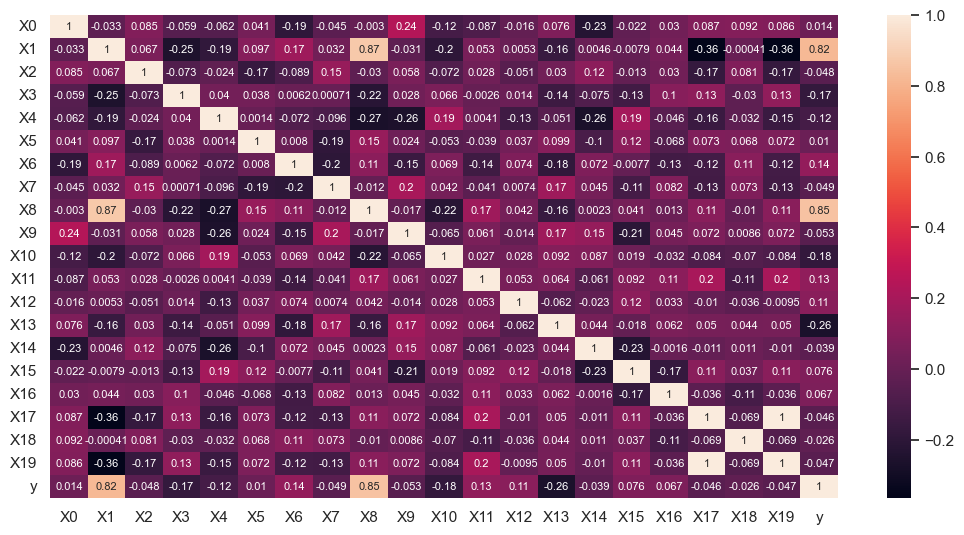

In [144]:
sns.set(rc={'figure.figsize':(12.7, 6.27)})
sns.heatmap(df.corr(method = 'spearman'), annot=True, annot_kws={'fontsize':8})

In [176]:
# Убираем X17 и  X19 - сильная корреляция между собой и слабая с целевым значением
df_1 = df.copy()
df_1.drop(['X4', 'X16'], axis= 1 , inplace= True)

In [177]:
selector = VarianceThreshold(threshold=0.99)
df_1 = selector.fit_transform(df_1)
# сохраняем заголовки оставшихся классов
l = selector.get_feature_names_out()
df_1.shape

(100, 7)

In [178]:
df_1 = pd.DataFrame(df_1, columns=l)
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X5      100 non-null    float64
 1   X6      100 non-null    float64
 2   X8      100 non-null    float64
 3   X11     100 non-null    float64
 4   X14     100 non-null    float64
 5   X15     100 non-null    float64
 6   X17     100 non-null    float64
dtypes: float64(7)
memory usage: 5.6 KB


In [179]:
cross_val_score(LogisticRegression(), df_1, y, scoring='accuracy').mean()

0.9800000000000001

Осуществите отбор признаков на основе дисперсионного анализа:
a) Выберите 5 лучших признаков с помощью скоринговой функции для классификации f_classif (SelectKBest(f_classif, k=5)).
b) Повторите п. 2 на отобранных признаках.

In [189]:
selector = SelectKBest(f_classif, k=5)
df_2 = selector.fit_transform(X, y)
# сохраняем заголовки оставшихся классов
l = selector.get_feature_names_out()
df_2.shape

(100, 5)

In [190]:
df_1 = pd.DataFrame(df_1, columns=l)
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x1      0 non-null      float64
 1   x3      0 non-null      float64
 2   x6      0 non-null      float64
 3   x8      0 non-null      float64
 4   x13     0 non-null      float64
dtypes: float64(5)
memory usage: 4.0 KB


In [191]:
cross_val_score(LogisticRegression(), df_2, y, scoring='accuracy').mean()

0.9800000000000001

a) Реализуйте отбор признаков с помощью логистической регрессии. Отобранные признаки подайте далее на вход в саму логистическую регрессию (SelectFromModel). Используйте L1 регуляризацию.

In [200]:
selector = SelectFromModel(estimator=LogisticRegression(class_weight='balanced', penalty='l1', solver='liblinear'))
df_3 = selector.fit(X, y)
l = selector.get_feature_names_out()
df_3

SelectFromModel(estimator=LogisticRegression(class_weight='balanced',
                                             penalty='l1', solver='liblinear'))

In [201]:
l

array(['x1', 'x4', 'x5', 'x6', 'x8', 'x11', 'x12', 'x13', 'x15'],
      dtype=object)

In [205]:
X_ = df_3.transform(X)
X_.shape

(100, 9)

In [206]:
cross_val_score(LogisticRegression(), X_, y, scoring='accuracy').mean()

0.97

b) Реализуйте отбор признаков с помощью модели RandomForest и встроенного атрибута feature_impotance.
c) Повторите п. 2 на отобранных признаках в п. 5a, п. 5b.

In [213]:
model = RandomForestClassifier(max_depth=3, random_state=42)
model.fit(X, y)


RandomForestClassifier(max_depth=3, random_state=42)

In [249]:
res = {}
for i in range(len(labels)):
    res[labels[i]] = model.feature_importances_[i]

res = dict(sorted(res.items(), key=lambda x: x[1], reverse=True)[:5])
X_= df[list(res.keys())]
X_.head()


,X8,X1,X13,X10,X19
0,1.275512,1.344425,-1.032731,0.126818,-0.686889
1,-0.671204,-0.835955,1.047759,-0.408778,0.553955
2,1.209159,1.006219,-0.337035,1.003949,-0.249241
3,-1.898914,-1.323480,-0.744298,-0.471483,0.006790
4,-0.946882,-0.937274,0.144044,0.777922,0.418877


In [250]:
cross_val_score(LogisticRegression(), X_, y, scoring='accuracy').mean()

0.97

In [53]:

# извлечение признаков
model = ExtraTreesClassifier()
model.fit(X, y) # обучение
for i in range(len(labels)-1):
    print(f"{labels[i]}\t- {model.feature_importances_[i]:.4f}")

X0	- 0.0250
X1	- 0.0179
X2	- 0.0229
X3	- 0.3503
X4	- 0.1229
X5	- 0.0228
X6	- 0.0239
X7	- 0.0254
X8	- 0.1031
X9	- 0.0211
X10	- 0.0257
X11	- 0.0296
X12	- 0.0303
X13	- 0.0219
X14	- 0.0205
X15	- 0.0209
X16	- 0.0417
X17	- 0.0272
X18	- 0.0225


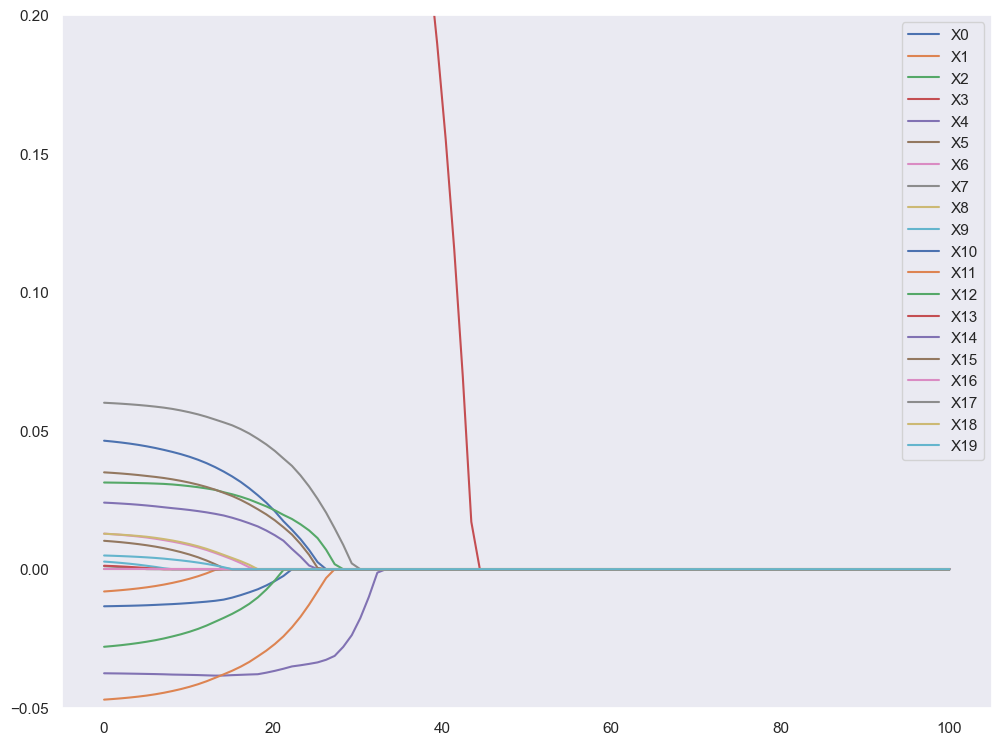

In [61]:


X_sc = StandardScaler().fit_transform(X) # преобразование данных
lg_l,pred_l = [], []

list_l=list(2**np.linspace(-10,10,100))

# строим n-ое кол-во моделей Лассо, меняя коэффициент регуляризации, сохраняя модель и коэффициенты
for i in range(len(list_l)):
    m_l = Lasso(alpha=list_l[i]).fit(X_sc, y)
    lg_l.append(m_l)
    pred_l.append(m_l.coef_)

# рисуем отмасштабированные признаки на одном графике
plt.figure(figsize=(12,9))
x_l = np.linspace(0,len(pred_l),len(pred_l))
for i in np.vstack(pred_l).T:
    plt.plot(x_l,np.sign(i)*np.abs(i)) 
plt.ylim(-0.05,0.2)  
plt.legend(labels)      
plt.grid()